# Pymaceuticals Inc.
---

### Analysis

Amongst all the drug regimens, Capomulin is very effective. However, when looking at the boxplot, one could also deduce that Ramicane is also a viable treatment as well.
 

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count = study_data_complete["Mouse ID"].unique().size
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

study_duplicate = study_data_complete[study_data_complete[['Mouse ID', 'Timepoint']].duplicated() == True]

duplicate_mouse = study_duplicate["Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
rows_for_dup_id = study_data_complete[study_data_complete["Mouse ID"] == duplicate_mouse[0]]
rows_for_dup_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexDrop = study_data_complete[(study_data_complete["Mouse ID"] == duplicate_mouse[0])].index
study_data_complete.drop(indexDrop , inplace=True)
study_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = study_data_complete["Mouse ID"].unique().size
mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

study_data_summary = pd.DataFrame(study_data_complete.groupby(["Drug Regimen"],as_index=False)["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])).sort_values("Drug Regimen", ascending=True)
study_data_summary.rename(columns = {"mean": "Mean Tumor Volume"}, inplace=True)
study_data_summary.rename(columns = {"median": "Median Tumor Volume"}, inplace=True)
study_data_summary.rename(columns = {"var": "Tumor Volume Variance"}, inplace=True)
study_data_summary.rename(columns = {"std": "Tumor Volume Std. Dev."}, inplace=True)
study_data_summary.rename(columns = {"sem": "Tumor Volume Std. Err."}, inplace=True)

study_data_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

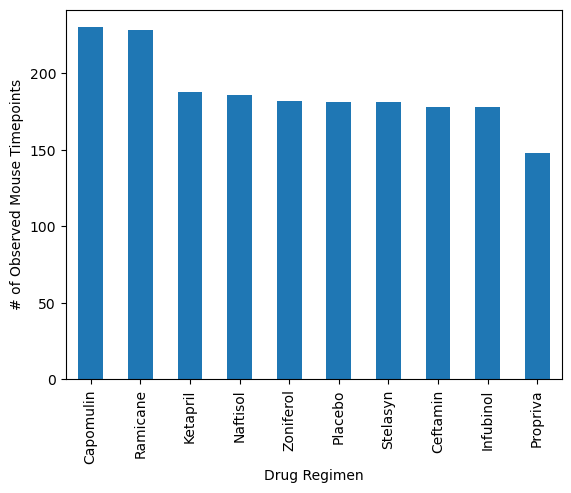

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_df_bar = pd.DataFrame(study_data_complete.groupby(["Drug Regimen"], as_index=False)["Mouse ID"].count()).sort_values("Mouse ID", ascending=False)
pandas_df_bar = pandas_df_bar.set_index("Drug Regimen")

ax = pandas_df_bar.plot.bar(legend=False).set_ylabel("# of Observed Mouse Timepoints")

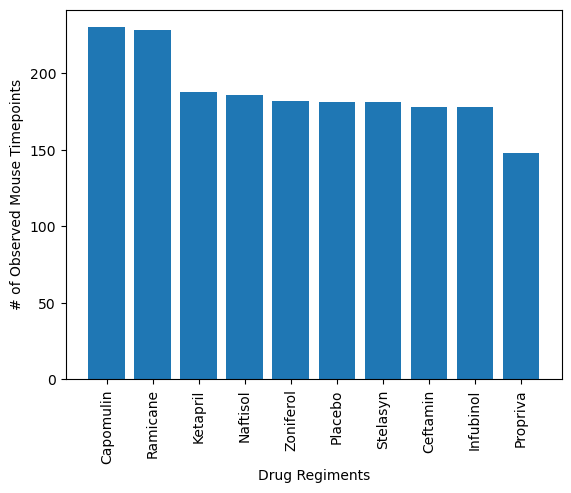

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pandas_df_bar = pd.DataFrame(study_data_complete.groupby(["Drug Regimen"], as_index=False)["Mouse ID"].count()).sort_values("Mouse ID", ascending=False)
pandas_df_bar = pandas_df_bar.set_index("Drug Regimen")

plt.bar(pandas_df_bar.index, pandas_df_bar["Mouse ID"])
plt.xlabel("Drug Regiments")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

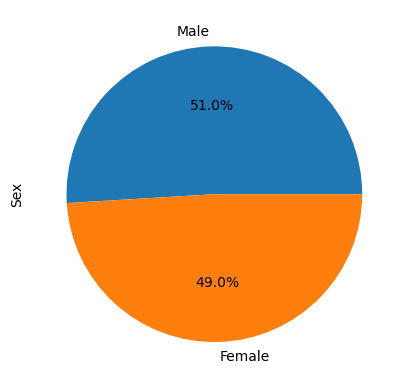

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
ax=study_data_complete.groupby(["Sex"]).count().sort_values("Sex", ascending=False).plot(kind="pie", y="Mouse ID", legend=False, autopct="%1.1f%%", ylabel="Sex")


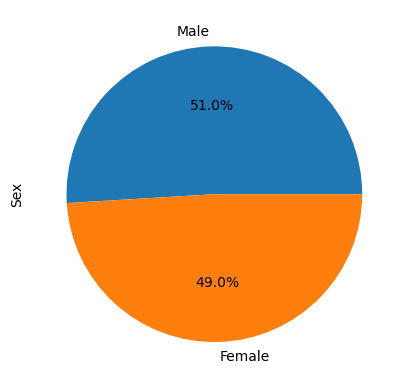

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
ax=study_data_complete.groupby(["Sex"]).count().sort_values("Sex", ascending=False)
data=ax["Mouse ID"]
labels=ax.index
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

study_data_prep = study_data_complete.groupby(["Mouse ID"], as_index=False)["Timepoint"].max().reset_index()
study_data_max = pd.merge(study_data_prep,study_data_complete, how="left", on=["Mouse ID", "Timepoint"])
study_data_max


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,a203,45,67.973419,2,Infubinol,Female,20,23
1,1,a251,45,65.525743,1,Infubinol,Female,21,25
2,2,a262,45,70.717621,4,Placebo,Female,17,29
3,3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...,...
243,243,z435,10,48.710661,0,Propriva,Female,12,26
244,244,z578,45,30.638696,0,Ramicane,Male,11,16
245,245,z581,45,62.754451,3,Infubinol,Female,24,25
246,246,z795,45,65.741070,3,Naftisol,Female,13,29


In [88]:
# The four treatment groups, Capomulin, Ramicane, Infubinol, and Ceftamin, are put in a list.
# An empty list is created to fill with tumor volume data.
# A for loop is used to display the interquartile range (IQR) and the outliers for each treatment group

top_treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
tumor_volume = []
data_for_boxplot = pd.DataFrame()

for treatment in top_treatments:
   
    tumor_volume = study_data_max.query("`Drug Regimen`=='"+str(treatment)+"'")["Tumor Volume (mm3)"]
    data_for_boxplot[treatment] = tumor_volume.values

    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(treatment + ":")

    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier_count = 0
    outliers = ""
    for volume in tumor_volume:
        if volume < lower_bound or volume > upper_bound:
            outliers = outliers + " " + str(volume)
            outlier_count = outlier_count + 1

    if outlier_count == 0:
        print("There are no potential outliers.")
    else:
        print("The potential outliers are:"+outliers)



Capomulin:
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
There are no potential outliers.
Ramicane:
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
There are no potential outliers.
Infubinol:
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The potential outliers are: 36.3213458
Ceftamin:
The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
There are no potential outliers.


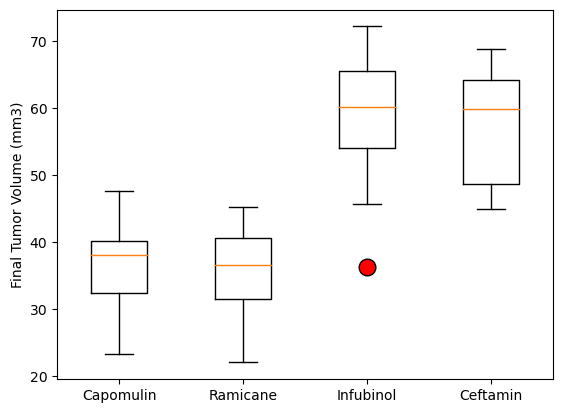

In [14]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

cols = list(data_for_boxplot.columns)
flierprops = dict(markerfacecolor='red', markersize=12)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data_for_boxplot, labels=cols, flierprops=flierprops)
plt.show()



## Line and Scatter Plots

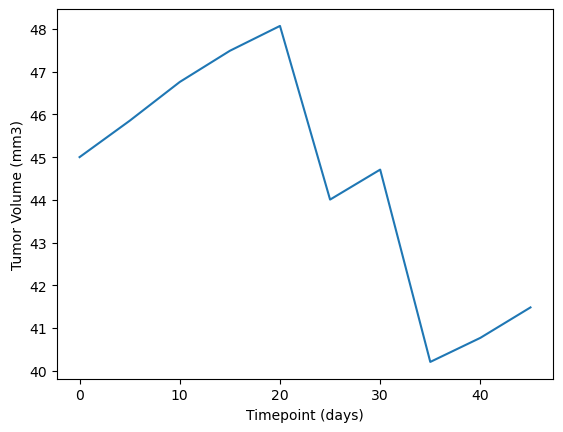

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
times = study_data_complete[study_data_complete["Mouse ID"]=="l509"]["Timepoint"]
vol = study_data_complete[study_data_complete["Mouse ID"]=="l509"]["Tumor Volume (mm3)"]

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(times, vol)
plt.show()


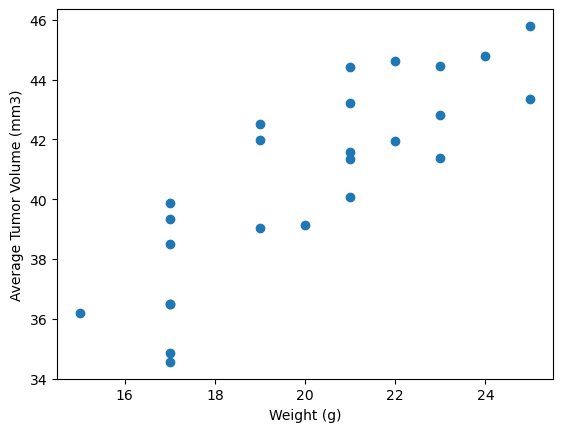

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_vol = study_data_complete[study_data_complete["Drug Regimen"]=="Capomulin"].groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

weight = avg_vol["Weight (g)"]
average_volume = avg_vol["Tumor Volume (mm3)"]

plt.scatter(weight, average_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


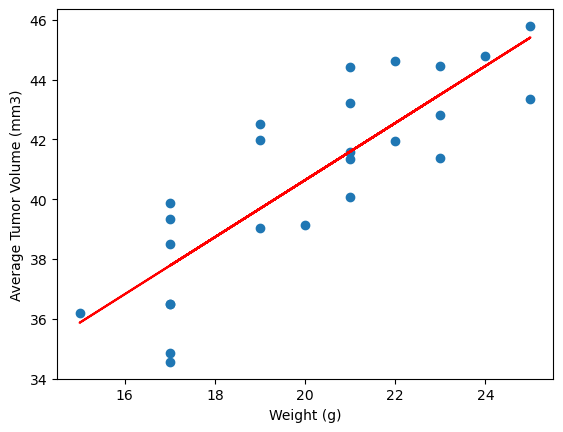

In [86]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_vol = study_data_complete[study_data_complete["Drug Regimen"]=="Capomulin"].groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

weight = avg_vol["Weight (g)"]
average_volume = avg_vol["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_volume)
regress_values = weight * slope + intercept

plt.scatter(weight, average_volume)
plt.plot(weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print("The correlation between mouse weight and the average tumor volume is "+"{:.2f}".format(rvalue))

plt.show()
